In [1]:
# Importing libraries....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
# Importing the data....
# /content/drive/MyDrive/Churn_Modelling.csv
data = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Checking the data dtypes...
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# Now checking for the Null Values....
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# That's great there is no null values...
data.shape

(10000, 14)

In [8]:
# So we have total 10000 rows and 13 columns.....
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

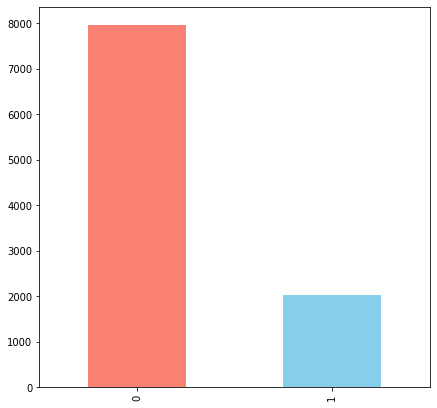

In [23]:
data["Exited"].value_counts().plot(kind="bar",color=["salmon","skyblue"],figsize=(7,7))

In [24]:
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [29]:
# Now Splitting the data into Independent and Dependent Category
X = data.drop(["RowNumber","CustomerId","Surname","Exited"],axis=1)
y = data["Exited"]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [32]:
# Converting categorical columns into numbers....
onehot = OneHotEncoder()
cat_f = ["Geography","Gender"]
trans = ColumnTransformer([("onehot",onehot,cat_f)],remainder="passthrough")
trans_X = trans.fit_transform(X)
trans_X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [34]:
# Now splitting the data into training and testing....
np.random.seed(42)
X_train,X_test,y_train,y_test  = train_test_split(trans_X,y,test_size=0.25,random_state=42)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7500, 13), (2500, 13), (7500,), (2500,))

In [37]:
# Feature Scaling...
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
X_train

array([[1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.10493081],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.15877358],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.30636459],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.46092526],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.48738065],
       [0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        0.26761502]])

In [42]:
# Now Building the model...
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [48]:
# Initializing the model...
model = Sequential()

# First Hidden Layer......
model.add(Dense(7,kernel_initializer="uniform",activation="relu"))

# Second Hidden Layer....
model.add(Dense(units=14,kernel_initializer="uniform",activation="relu"))

# Third Hidden Layer...
model.add(Dense(21,kernel_initializer="uniform",activation="relu"))

# Compiling Layer...
model.compile(optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.01),loss = tensorflow.keras.losses.BinaryCrossentropy(),metrics="accuracy")

# Adding the output layer...
model.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

# Fitting the model on the data....
history = model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=2)

Epoch 1/50
235/235 - 1s - loss: 0.6214 - accuracy: 0.7920
Epoch 2/50
235/235 - 0s - loss: 0.5485 - accuracy: 0.7947
Epoch 3/50
235/235 - 0s - loss: 0.5237 - accuracy: 0.7947
Epoch 4/50
235/235 - 0s - loss: 0.5143 - accuracy: 0.7947
Epoch 5/50
235/235 - 0s - loss: 0.5105 - accuracy: 0.7947
Epoch 6/50
235/235 - 0s - loss: 0.5090 - accuracy: 0.7947
Epoch 7/50
235/235 - 0s - loss: 0.5083 - accuracy: 0.7947
Epoch 8/50
235/235 - 0s - loss: 0.5080 - accuracy: 0.7947
Epoch 9/50
235/235 - 0s - loss: 0.5078 - accuracy: 0.7947
Epoch 10/50
235/235 - 0s - loss: 0.5078 - accuracy: 0.7947
Epoch 11/50
235/235 - 0s - loss: 0.5078 - accuracy: 0.7947
Epoch 12/50
235/235 - 0s - loss: 0.5077 - accuracy: 0.7947
Epoch 13/50
235/235 - 0s - loss: 0.5077 - accuracy: 0.7947
Epoch 14/50
235/235 - 0s - loss: 0.5077 - accuracy: 0.7947
Epoch 15/50
235/235 - 0s - loss: 0.5077 - accuracy: 0.7947
Epoch 16/50
235/235 - 0s - loss: 0.5077 - accuracy: 0.7947
Epoch 17/50
235/235 - 0s - loss: 0.5077 - accuracy: 0.7947
Epoch 

In [49]:
model.evaluate(X_test,y_test)

79/79 [==============================] - 0s 1ms/step - loss: 0.4989 - accuracy: 0.8012


[0.49887949228286743, 0.8011999726295471]

In [70]:
# Evaluating the model...
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
  model = Sequential()
  model.add(Dense(units=7,kernel_initializer="uniform",activation="relu"))
  model.add(Dense(units=14,kernel_initializer="uniform",activation="relu"))
  model.add(Dense(units=21,kernel_initializer="uniform",activation="relu"))
  model.compile(optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.01),loss=tensorflow.keras.losses.BinaryCrossentropy(),metrics=["accuracy",])
  return model

In [71]:
clf  = KerasClassifier(build_fn=build_classifier,batch_size=100)
acc = cross_val_score(clf,X=X_train,y=y_train,cv=10,)
acc

8/8 [==============================] - 0s 2ms/step - loss: 4.3366 - accuracy: 0.0000e+00


array([0.        , 0.        , 0.        , 0.        , 0.81733334,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [72]:
acc.mean()

0.08173333406448365